##### Book: Understanding 'self' in Python Classes

<font color='gray'> Carmen Haukes -- 12/March/2025 </font>

<font color='gray'> chaukes@cab.inta-csic.es </font>


## **Introduction to Classes and `self`**
A **class** is a **blueprint** for creating objects, and an **object** is an instance of a class (OOP, Object-Oriented Programming).

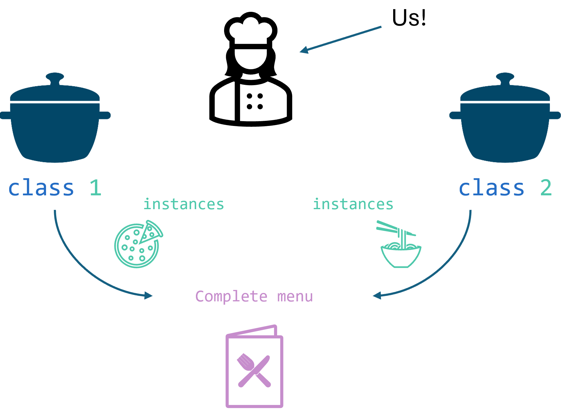

It's like a chef who has to prepare the daily menu. They won't make all the dishes in the same *pot*; instead, they'll use different ones (`classes`) with their respective ingredients (`objects and instances`). But later, they can combine them as they want, just like if they want to repeat a dish on another day.

*In this way, OOP help us create reusable and organized code, just like a well-structured cookbook!* 

<br>

## **Why is `self` important in classes?**  
One of the most important concepts in Python classes is the **`self` keyword**. It serves as **a reference to the current instance** of the class and allows us to:

- Access and modify instances of a class.
- Call other methods within the class.
- Distinguish instance variables from local variables.


<br>

## **`self` as a container**

Using `self` in a class is like using a _box_ to carry data between functions. Without `self`, the functions would not know where to get or store the information, leading to errors.

We can consider a class that transforms objects in real life (next image):

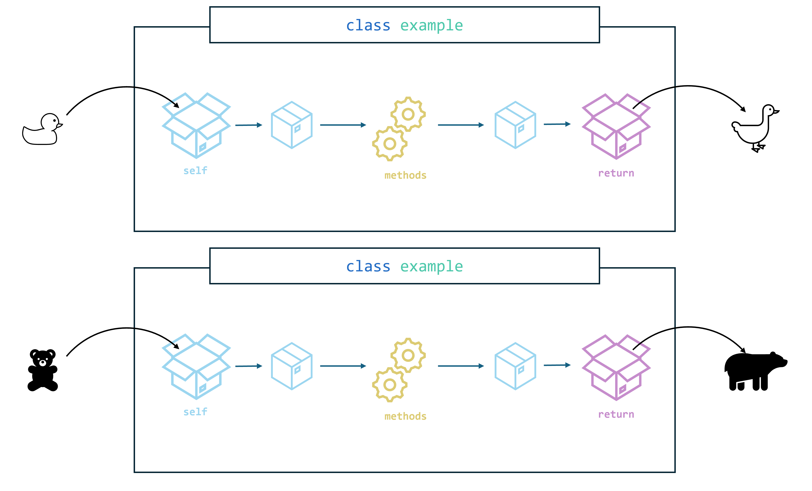

1) **Self (blue box)**
    - `self` is a **container** for the instance's attributes.
    - It stores propeties (i.e. colour, size...).
    - Every method inside the class (`functions`) can access this box. 

2) **Methods (yellow gears)**
    - `Methods` defined at the class operate on the instance. 
    - They take values from `self`, modify or use them, and possibly return a result. 
    - Without `self`, these functions would not know which object's attributes to use. 

3) **Return (purple box)**
    - After functions process the data of the _box_, they might retun new values.
    - The box (`self`) ensures that the right attributes star connected to the right instance. 

<br>

### Simple Example

Imagine a scenario where we are modeling exoplanets. Each exoplanet has unique properties such as **name, mass, radius, and host star**. If we do not use `self`, all objects would share the same values, rather than having distinct attributes per instance.

Python automatically passes the instance (`self`) when calling methods within a class. For that, we do not define `self` as an instance, however it must be declared in the methods *inside* the class.

1) **Defining a class** for an exoplanet

In [1]:
from numpy import pi

class Exoplanet:
    def __init__(self, name, mass, radius, star, mass_star, distance):
        self.name = name  # 'self.name' is an instance attribute
        self.mass = mass  # Mass in Earth masses
        self.radius = radius  # Radius in Earth radii
        self.star = star  # Host star name
        self.mass_star = mass_star * 1.989e30  # convert solar masses to kg   
        self.distance = distance * 1.496e11  # convert AU to meters 
    
    def show_info(self):
        print(f"Exoplanet: {self.name}")
        print(f"Mass: {self.mass} Earth masses")
        print(f"Radius: {self.radius} Earth radii")
        print(f"Orbits around: {self.star}")
        print(f"Host star mass: {self.mass_star} kg")
        print(f"Mass of {self.star}: {self.mass_star / 1.989e30:.3e} solar masses")
        print(f"Distance between {self.name} and {self.star}: {self.distance / 1.496e11} AU")
        

    def calculate_density(self):
        volume = (4/3) * pi * (self.radius ** 3)  # Approximate volume
        density = self.mass / volume  # Density in Earth masses per Earth volume
        return density
    
    def update_mass(self, new_mass):
        self.mass = new_mass  # Updating the same instance box
        new_density = self.calculate_density()  # Recalculating density
        print(f"New mass: {self.mass} Earth masses")
        print(f"New density: {new_density} Earth masses per Earth volume")

2) Creating an example instance of the class

In [2]:
kepler_22b = Exoplanet("Kepler-22b", 2.4, 1.2, "Kepler-22", 0.97, 0.849) # specific instance of the class

3) Calling the method that uses `self`

In [3]:
kepler_22b.show_info()
print('\n')
density = kepler_22b.calculate_density()
print(f"Density of {kepler_22b.name}: {density:.3f} Earth masses per Earth volume")      

Exoplanet: Kepler-22b
Mass: 2.4 Earth masses
Radius: 1.2 Earth radii
Orbits around: Kepler-22
Host star mass: 1.92933e+30 kg
Mass of Kepler-22: 9.700e-01 solar masses
Distance between Kepler-22b and Kepler-22: 0.849 AU


Density of Kepler-22b: 0.332 Earth masses per Earth volume




When `show_info()` and `calculate_density()` are called, Python automatically passes `self` (the instance `kepler_22b`) so that attributes like `self.name` are correctly retrieved.

<br>

## `self` as the 'own class'

The utility of `self` goes beyond just storing attributes defined during initialization. It allows us to **modify** thse atributes within other methods (as long as `self`is correctly referenced). 
But more important, `self`allows an instance to **call other methods from the same class**, treating itself (never say better) as if it were the entire class. 


If we take a look at the method `update_mass`:

``` python 
    def update_mass(self, new_mass):
        self.mass = new_mass  # Updating the same instance
        new_density = self.calculate_density()  # Recalculating density
        print(f"New mass: {self.mass} Earth masses")
        print(f"New density: {new_density} Earth masses per Earth volume")

```

Here’s why this is useful:

1) **Methods Can Interact**: We can call other methods inside a class using `self.method_name()`.
2) **Better Structure**: Instead of writing all logic inside one function, we can split responsibilities into different methods and call them as needed.
3) **Encapsulation** – The object maintains its own internal data and behavior, making it modular and reusable.

This technique allows **more readable and fluid code**, especially in scientific simulations where multiple updates happen in sequence.

In [4]:
kepler_22b.update_mass(2.6)

New mass: 2.6 Earth masses
New density: 0.359203864617125 Earth masses per Earth volume


<br>

### Example different classes
We consider then `self` as a class (storing its attributes and methods). With the correct order and distribution, we can use it in other classes. If we define other class to calculate orbital parameters:

In [5]:
import math

class OrbitalParameters:
    def __init__(self, exoplanet,orbital_eccentricity=0.0):
        self.mass_planet = exoplanet.mass *  5.972e24 # convert Earth masses to kg
        self.name_planet = exoplanet.name
        self.name_star = exoplanet.star
        self.mass_star = exoplanet.mass_star * 1.989e30  # convert solar masses to kg   
        self.distance = exoplanet.distance # convert AU to meters       
        self.orbital_eccentricity = orbital_eccentricity  
        self.G = 6.67430e-11

        self.density_funtion = exoplanet.calculate_density  


    def gravitational_force(self):
        force = self.G * self.mass_planet * self.mass_star / self.distance**2
        return force

    def orbital_period(self):
        period = 2 * math.pi * math.sqrt(self.distance**3 / (self.G * self.mass_star))
        return period

    def semi_major_axis(self):
        return self.distance

    def eccentricity(self):
        return self.orbital_eccentricity
    
    def density(self):
        return self.density_funtion()  
    
    def show_result(self):
        print(f"Exoplanet: {self.name_planet}")
        print(f"Host star: {self.name_star}")
        print(f"Distance between {self.name_planet} and {self.name_star}: {self.distance / 1.496e11} AU")
        print(f"Mass of {self.name_planet}: {self.mass_planet /  5.972e24:.3e} Earth masses")
        print(f"Mass of {self.name_star}: {self.mass_star / 1.989e30:.3e} solar masses")
        print(f"Gravitational force between {self.name_planet} and {self.name_star}: {self.gravitational_force():.3e} N")
        print(f"Orbital period of {self.name_planet}: {self.orbital_period () / (60 * 60 * 24):.3f} days")
        print(f"Semi-major axis of {self.name_planet}: {self.semi_major_axis () / 1.496e11 } AU")
        print(f"Eccentricity of {self.name_planet}: {self.eccentricity ()}")
        print(f"Density of {self.name_planet}: {self.density():.3f} Earth masses per Earth volume")


In [6]:
orbital_params = OrbitalParameters(kepler_22b)

orbital_params.show_result()

Exoplanet: Kepler-22b
Host star: Kepler-22
Distance between Kepler-22b and Kepler-22: 0.849 AU
Mass of Kepler-22b: 2.600e+00 Earth masses
Mass of Kepler-22: 1.929e+30 solar masses
Gravitational force between Kepler-22b and Kepler-22: 2.465e+53 N
Orbital period of Kepler-22b: 0.000 days
Semi-major axis of Kepler-22b: 0.849 AU
Eccentricity of Kepler-22b: 0.0
Density of Kepler-22b: 0.359 Earth masses per Earth volume


Other way to combine different classes is creating a chain of succedded classes. In that case, it is important to have an order and maintain the names of every class and heir instances (methods and attributes)

In [7]:
class data_exoplanet:
    def __init__(self, exoplanet, orbitalparameters = None):
        self.exoplanet = exoplanet
        if orbitalparameters is None:
            self.orbitalparameters = OrbitalParameters(exoplanet)
        else:
            self.orbitalparameters = orbitalparameters
    
    def caracteristics(self):
        self.exoplanet.show_info()
        print('\n')
        self.orbitalparameters.show_result()

This is a very useful way to reuse already written code or classes. But it’s very important to **stay organized**, because instances accumulate within one another, like russian dolls...


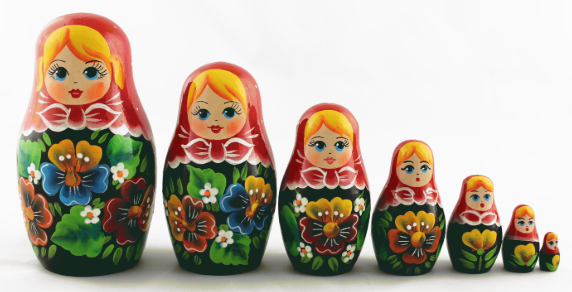

In [8]:
founded_exoplanet = data_exoplanet(kepler_22b)
founded_exoplanet.caracteristics()

Exoplanet: Kepler-22b
Mass: 2.6 Earth masses
Radius: 1.2 Earth radii
Orbits around: Kepler-22
Host star mass: 1.92933e+30 kg
Mass of Kepler-22: 9.700e-01 solar masses
Distance between Kepler-22b and Kepler-22: 0.849 AU


Exoplanet: Kepler-22b
Host star: Kepler-22
Distance between Kepler-22b and Kepler-22: 0.849 AU
Mass of Kepler-22b: 2.600e+00 Earth masses
Mass of Kepler-22: 1.929e+30 solar masses
Gravitational force between Kepler-22b and Kepler-22: 2.465e+53 N
Orbital period of Kepler-22b: 0.000 days
Semi-major axis of Kepler-22b: 0.849 AU
Eccentricity of Kepler-22b: 0.0
Density of Kepler-22b: 0.359 Earth masses per Earth volume


## **Conclusion**
In conclusion, self is a key to **reuse instances and carry attributes** for keeping the code **clean and organized**. However, one must be very careful with the names, strings, and all the instances that are used. These can grow like the Snake (or Python haha) game, so it’s important to be mindful of how long they get! 


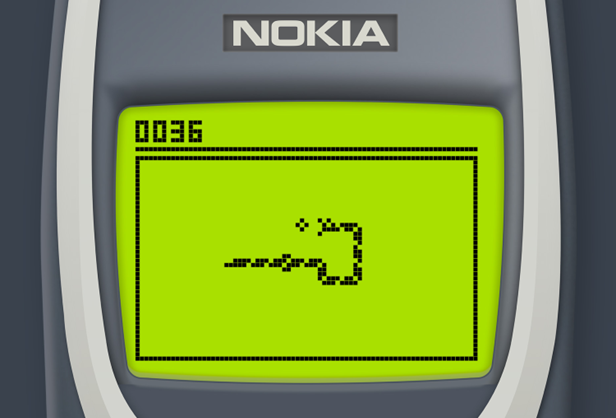

<br>

It’s also essential to **document** and explain within the code **what each instance is and where it comes from**, to make it **easier for other users** to read.

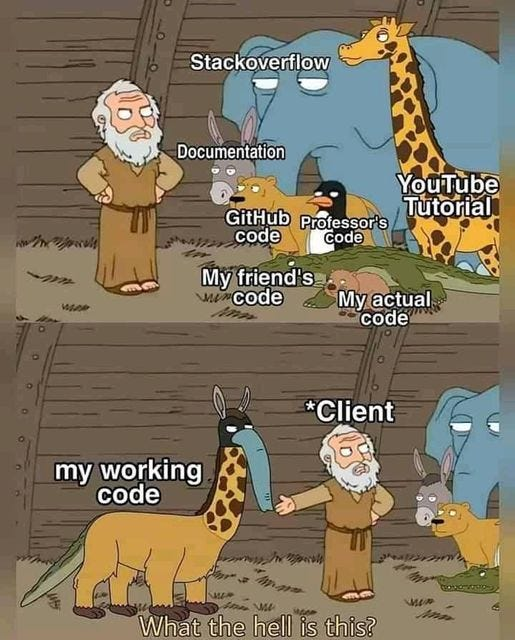

## Credits

Carmen Haukes

chaukes@cab.inta-csic.es